##  **소득 예측 AI 해커톤** ##

* 개인 특성 데이터를 활용하여 개인 소득 수준을 예측하는 AI 모델 개발
* 그 외 데이터 분석을 통한 시각화

#### Livrary Import & Dataset Load ####

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

##### train 데이터 확인

In [3]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [4]:
train.shape

(20000, 23)

In [5]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

##### train

* 20000개의 행과 23개의 열을 가지고 있다.
* 결측치는 존재하지 않는 것으로 생각된다.
* 데이터 타입은 int type과 object type으로 구성되어 있다.

##### 먼저 train, test 데이터의 'ID' 열을 삭제

In [119]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

##### train데이터 중 연속형(int) 변수 추출

In [8]:
# 연속형 변수 추출
train_int = train[train.describe().columns]

In [9]:
train_int.head()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
0,63,4,0,0,0,425
1,37,52,0,0,0,0
2,58,52,3411,0,0,860
3,44,52,0,0,0,850
4,37,52,0,0,0,570


> 연속형 변수에 대해 상관 관계 분석

* 오류 방지를 위해 +1 하고 진행

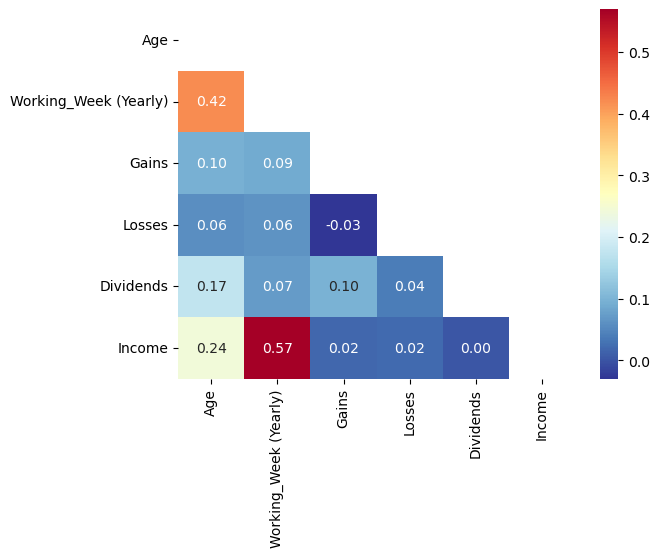

In [10]:
# 상관 행렬 계산
corr_matrix_int = np.log(train_int + 1).corr()

# 하삼각 행렬 마스크 생성
mask = np.triu(np.ones_like(corr_matrix_int, dtype=bool))

# 히트맵 생성
sns.heatmap(corr_matrix_int, annot=True, fmt=".2f", cmap='RdYlBu_r', mask=mask)
plt.show()

* Income(소득)과 관련해서 Age(나이), Working_Week (Yearly)(주당 일하는 시간) 큰 상관 관계를 보인다.
* Gains(이득), Losses(지출), Dividends(배당금)에 대해선 큰 관련이 없어 보인다. 모델 학습 시 고려해야 할 것으로 사료된다.

> Working_Week (Yearly)(주당 근무 시간)

count    20000.000000
mean        34.943050
std         22.254592
min          0.000000
25%          7.000000
50%         52.000000
75%         52.000000
max         52.000000
Name: Working_Week (Yearly), dtype: float64


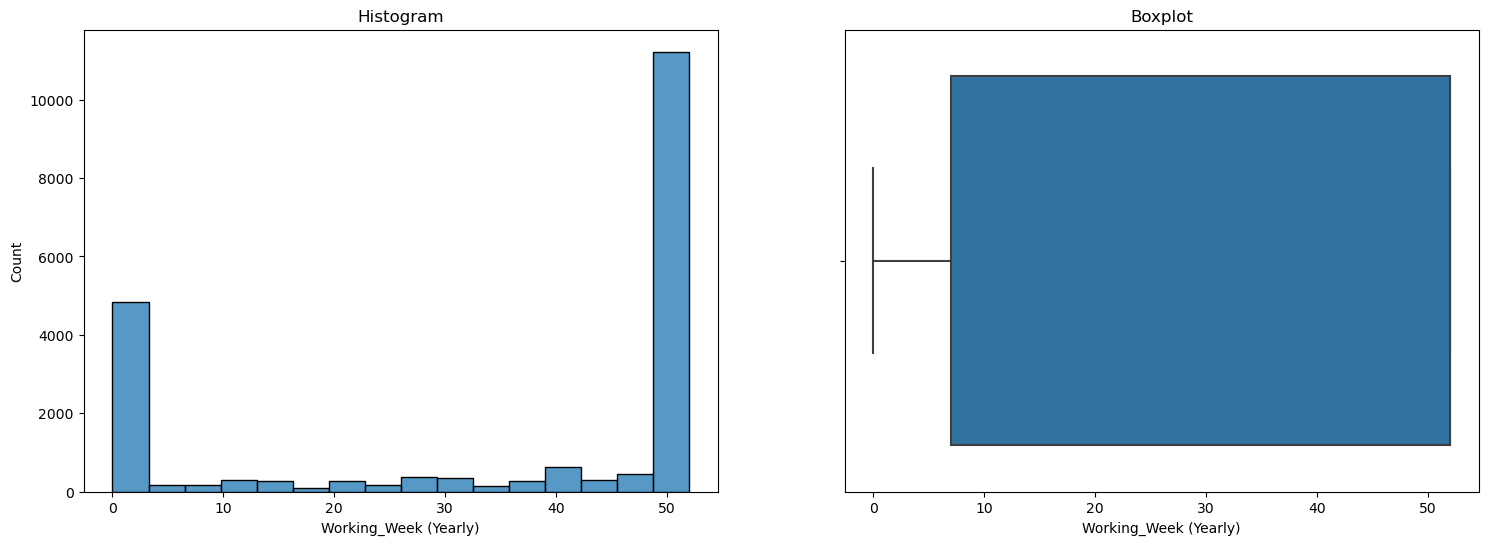

In [11]:
#Working_Week (Yearly)
fig=plt.figure(figsize=(18,6))

ax1=fig.add_subplot(1,2,1)
sns.histplot(data=train_int, x='Working_Week (Yearly)',ax=ax1)
ax1.set_title('Histogram')

ax2=fig.add_subplot(1,2,2)
sns.boxplot(data=train_int, x='Working_Week (Yearly)', ax=ax2)
ax2.set_title('Boxplot')

print(train_int['Working_Week (Yearly)'].describe())

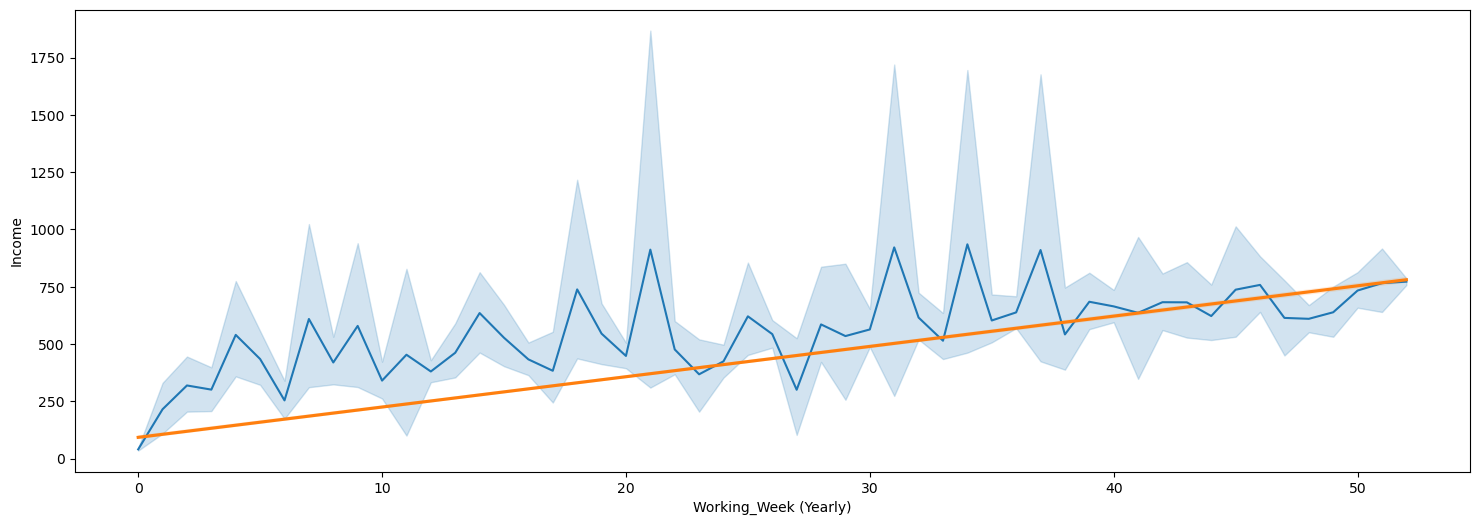

In [12]:
#뚜렷한 양의 상관 관계(Working_Week (Yearly))
fig = plt.figure(figsize=(18, 6))

sns.lineplot(data=train_int,x='Working_Week (Yearly)',y='Income')

sns.regplot(data=train_int, x='Working_Week (Yearly)', y='Income', scatter=False)

plt.show()

* 분포가 극단적인 것을 확인 할 수 있다.
* 50% 값이 Max값과 동일하다.
* Income(소득)과는 뚜렷한 양의 상관 관계로 보여진다.

> Age(나이)

count    20000.000000
mean        35.632500
std         17.994414
min          0.000000
25%         23.000000
50%         34.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64


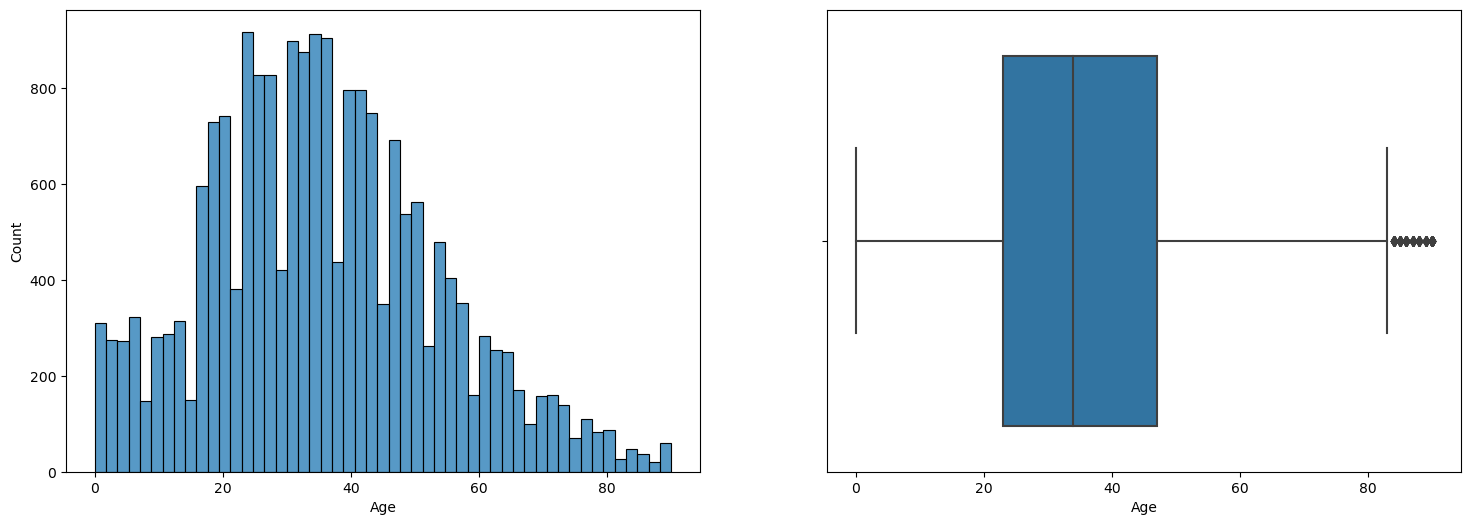

In [13]:
#Age
fig=plt.figure(figsize=(18,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.histplot(data=train_int, x='Age',ax=ax1)
sns.boxplot(data=train_int, x='Age', ax=ax2)

print(train_int['Age'].describe())

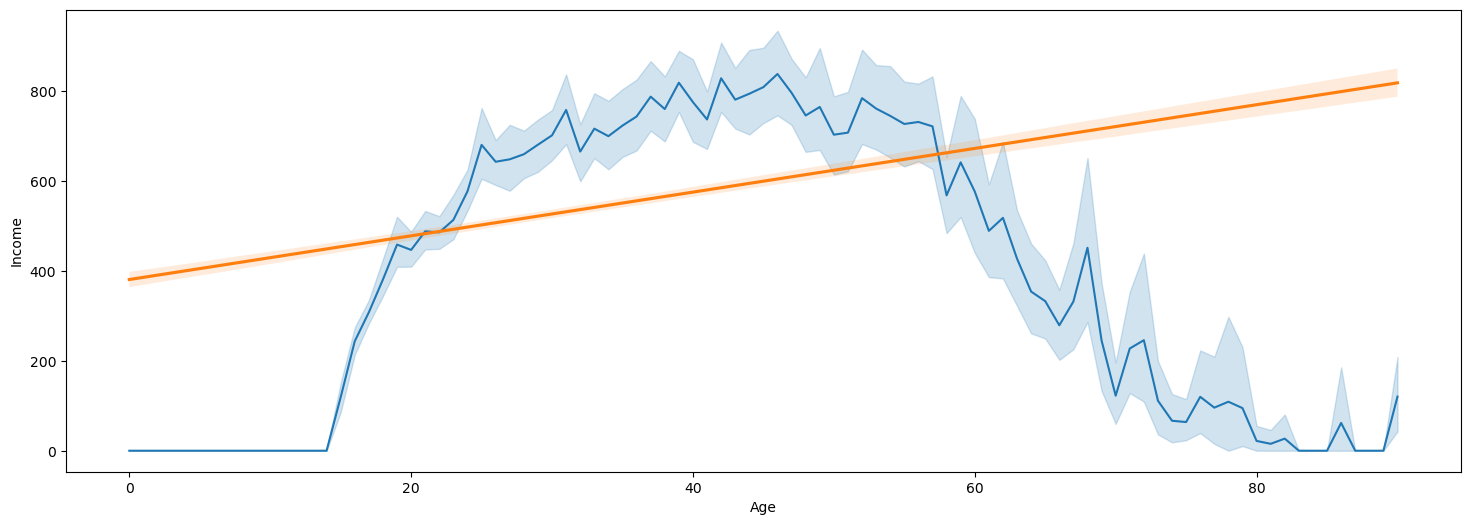

In [14]:
#약한 양의 상관 관계(Age)
fig = plt.figure(figsize=(18, 6))

sns.lineplot(data=train_int,x='Age',y='Income')

sns.regplot(data=train_int, x='Age', y='Income', scatter=False)

plt.show()

* 분포가 다양하며, 20~50대 사이 분포가 가장 많다.
* 평균은 36세 정도로 보인다.
* Income(소득)과 약한 양의 상관 관계를 보인다

##### 연속형 변수를 제외하고 object타입의 변수를 레이블 인코딩을 이용하여 데이터 처리

In [120]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(train.dtypes[train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    
    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train[i] = train[i].astype(str)
    test[i] = test[i].astype(str)
    
    le.fit(train[i])
    train[i] = le.transform(train[i])
    
    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case)
    
    test[i] = le.transform(test[i])

> train 데이터 상관 관계 분석

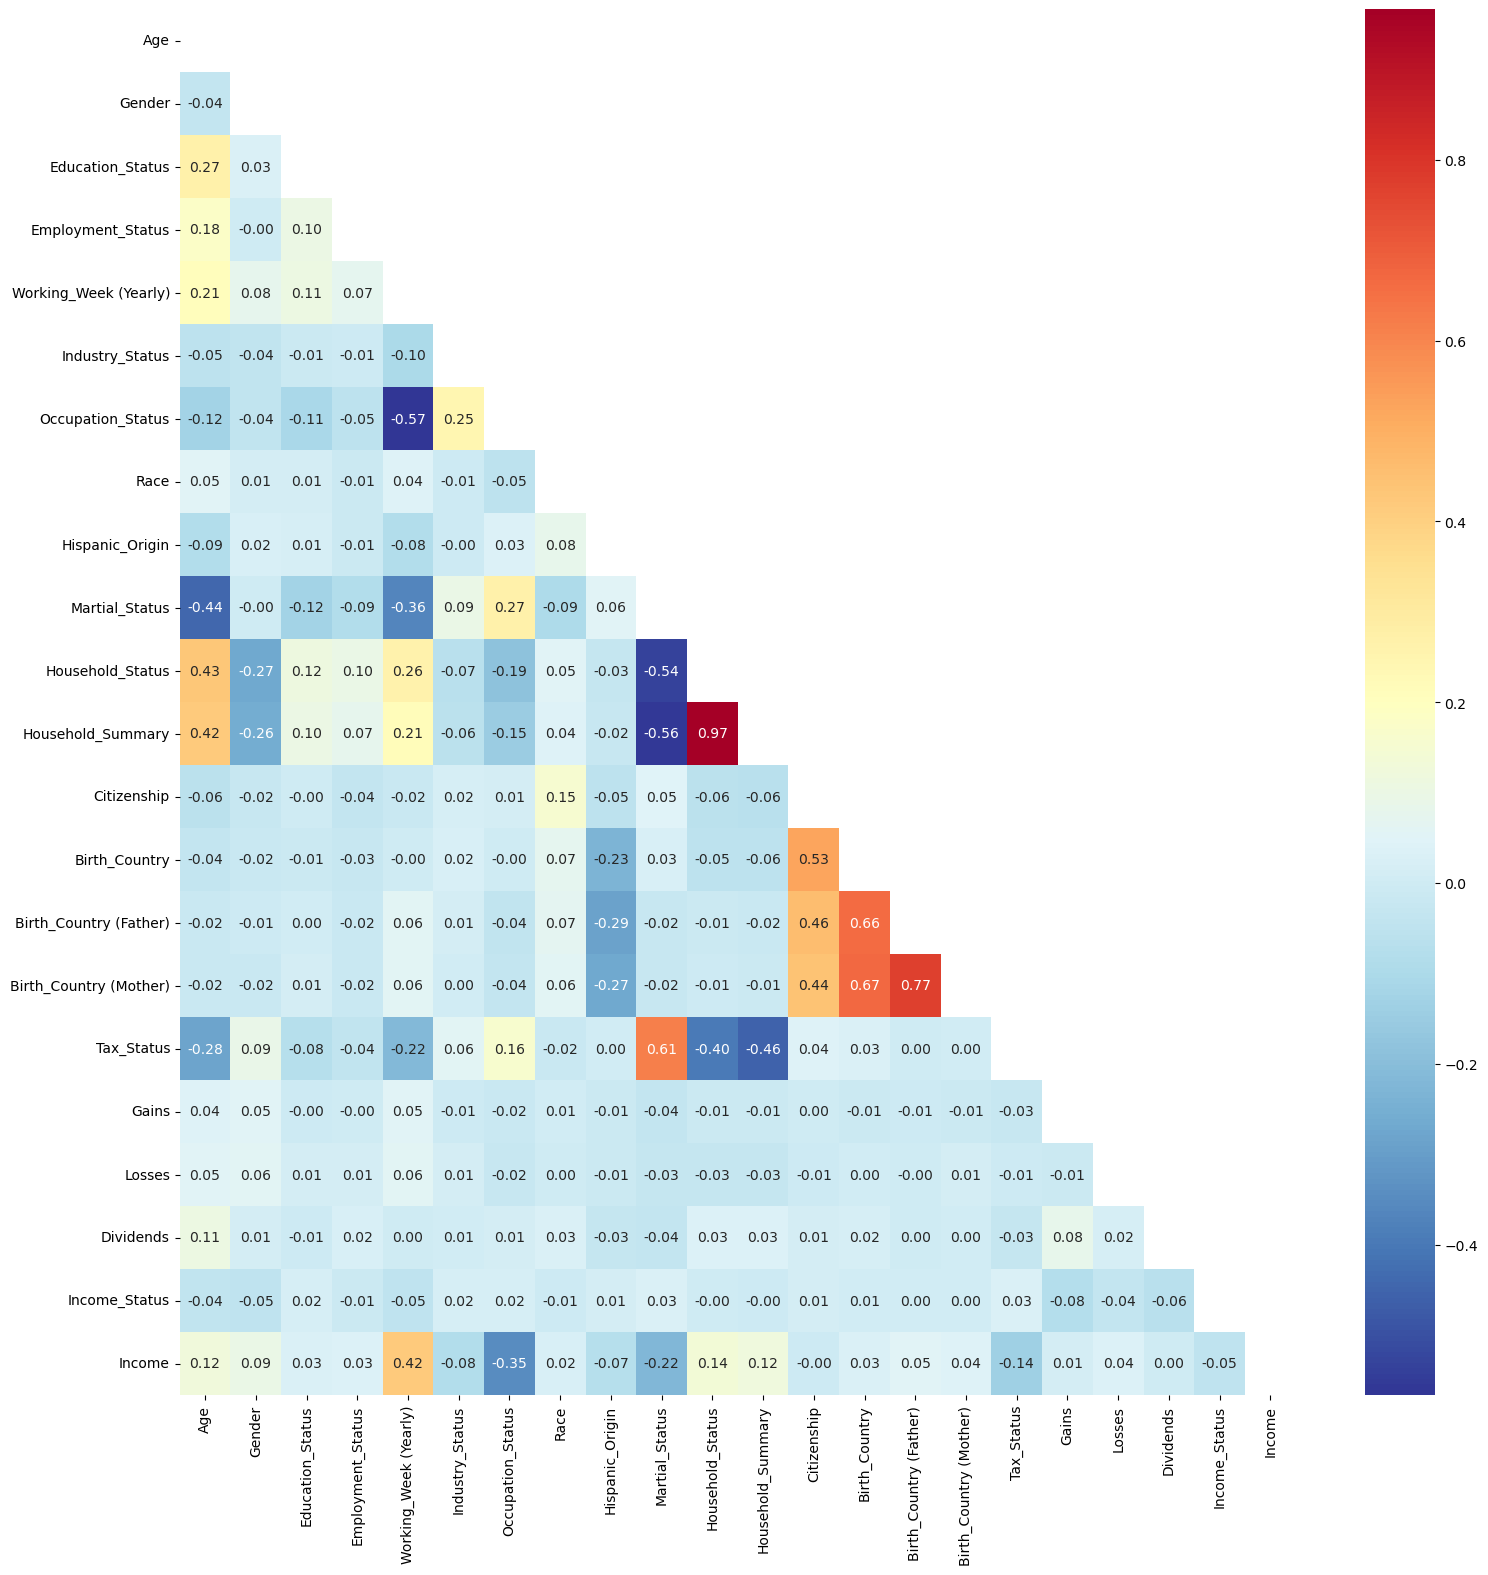

In [16]:
# 상관 행렬 계산
corr_matrix_str = train.corr()

# 하삼각 행렬 마스크 생성
mask = np.triu(np.ones_like(corr_matrix_str, dtype=bool))

# 히트맵 생성
plt.figure(figsize=(18, 18))

sns.heatmap(corr_matrix_str, annot=True, fmt=".2f", cmap='RdYlBu_r', mask=mask)
plt.show()

* 여전히 Working_Week (Yearly)은 큰 상관 관계를 나타낸다.
* 추가적으로 Occupation_Status(직업 분야), Martial_Status(결혼 여부)도 음의 상관 관계로 보여진다.
* 학습할 데이터를 추리는 것이 필요한 것으로 생각된다.

> Occupation_Status(직업 분야)

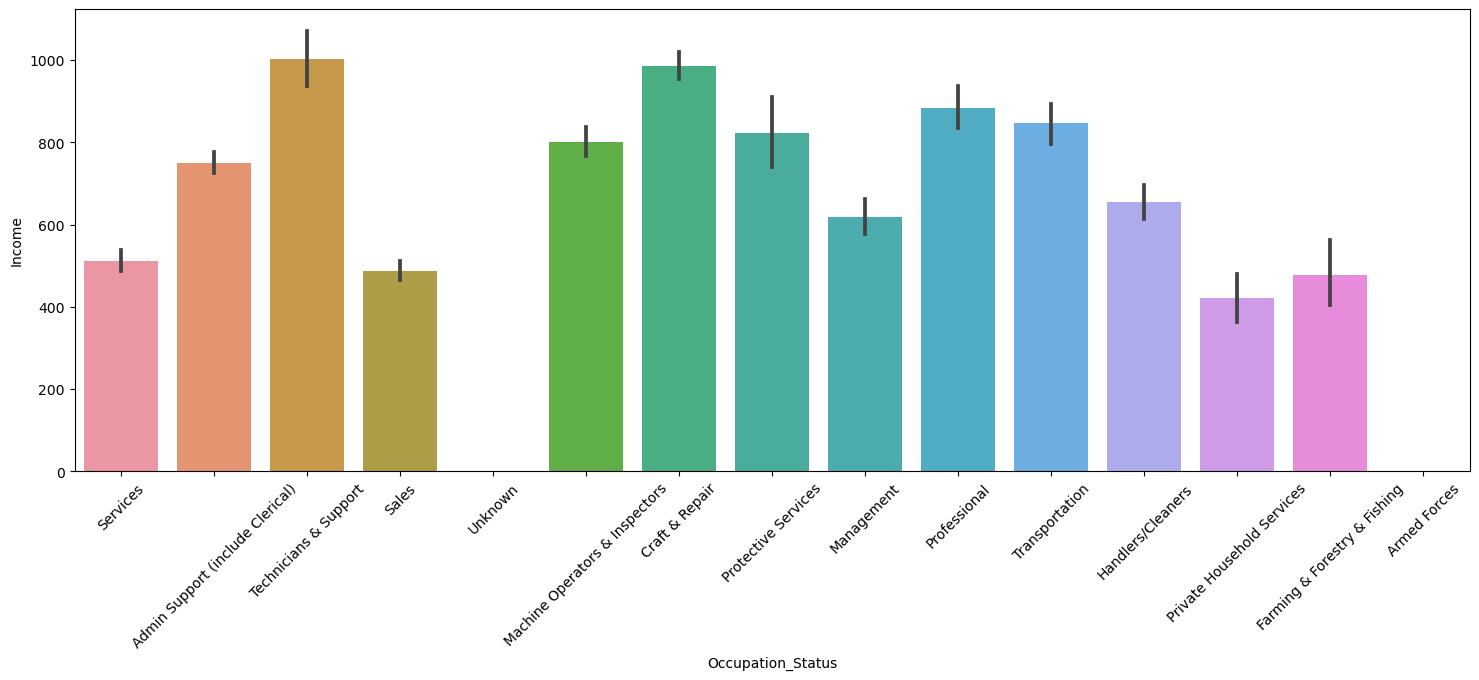

In [17]:
# Occupation_Status

train_temp = pd.read_csv('./train.csv')

fig = plt.figure(figsize=(18, 6))

sns.barplot(data=train_temp,x='Occupation_Status',y='Income')

plt.xticks(rotation=45)

plt.show()

* Technicians & Support, Craft & Repair 에 관련한 직업 분야가 소득이 상대적으로 높은 것으로 나타났다.

> Martial_Status(결혼 여부)

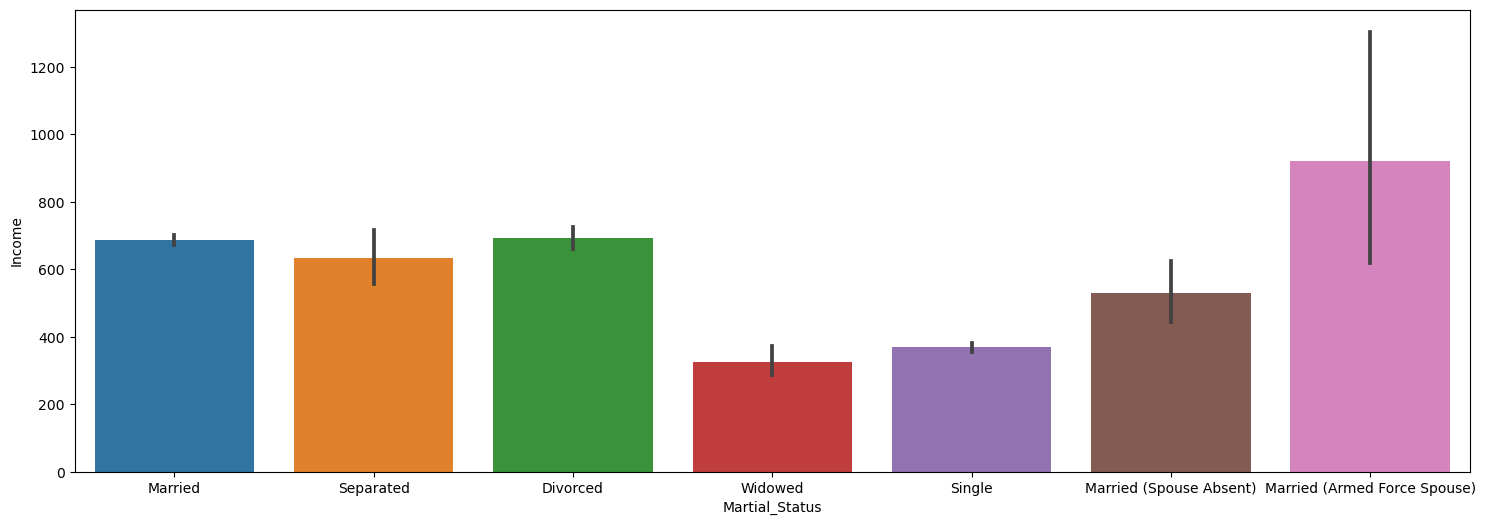

In [18]:
# Martial_Status

train_temp = pd.read_csv('./train.csv')

fig = plt.figure(figsize=(18, 6))

sns.barplot(data=train_temp,x='Martial_Status',y='Income')

plt.show()

* 결혼 여부를 확인해 보면 Married(Armed Force Spouse) 기혼(군인배우자)항목이 Income(소득)이 상대적으로 높은 것으로 나타난다.
* 다음으로 Income(소득)이 높은 항목은 Married(기혼), Divorced(미혼)으로 큰 차이는 없어 보인다.

#### RandomForest, GridSearchCV

* Race(인종), Citizenship(시민권), Gains(이득), Dividends(배당금) 열을 삭제하고 진행
* Age(나이), Working_Week (Yearly)(주당 근무 시간), Occupation_Status(직업 분야), Martial_Status(결혼 여부) 해당 열에는 가중치를 주어 진행
* GridSearchCV를 이용하여 최적의 파라미터를 찾는것이 목표
* RMSE, MAE로 평가

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found: {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 200}
RMSE:  588.9579790027769
MAE :  327.923200910695


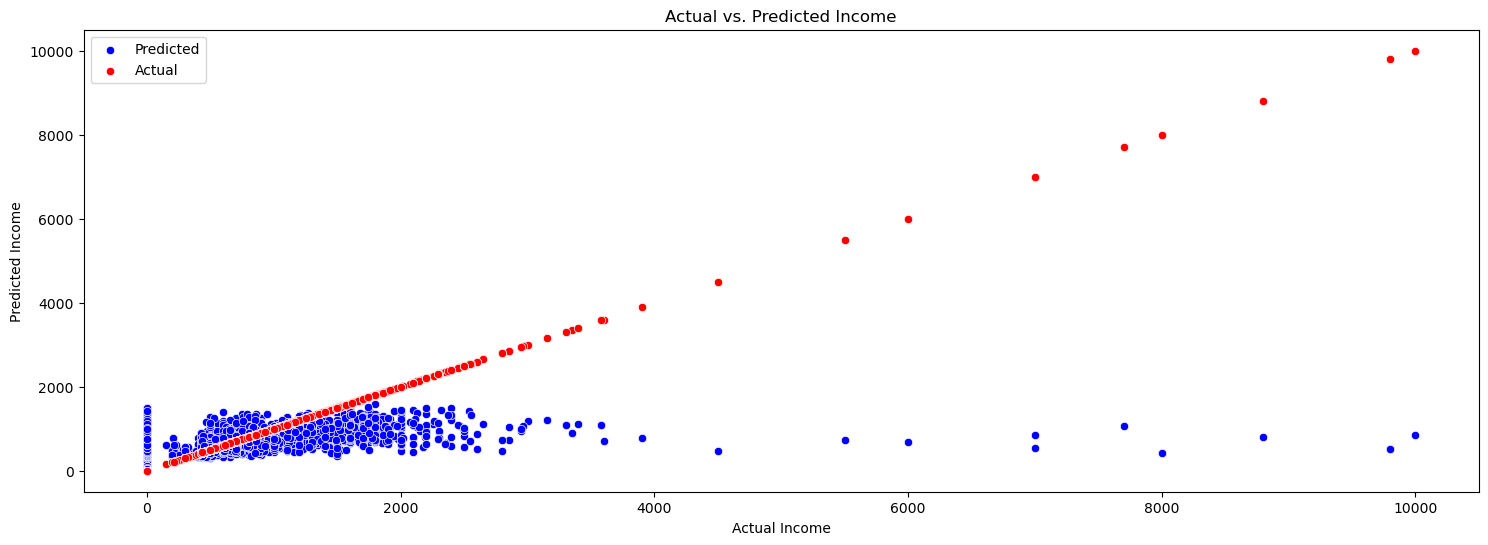

In [114]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Race, Citizenship, Gains, Dividends

# 데이터 준비
y = train['Income']
X = train.drop(['Income', 'Race', 'Citizenship', 'Gains', 'Dividends'], axis=1)

# 학습 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델
rf_reg = RandomForestRegressor(random_state=42)

# 가중치 설정
sample_weights = np.ones(len(X_train))  # 기본 가중치로 초기화

sample_weights[X_train['Age']] = 2.0 
sample_weights[X_train['Working_Week (Yearly)']] = 2.0 
sample_weights[X_train['Occupation_Status']] = 2.0 
sample_weights[X_train['Martial_Status']] = 2.0 


# 탐색할 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_leaf': [5, 7, 9],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 7],
    'max_features': [4, 5]
    
}
# 'max_features': ['auto', 'sqrt', 'log2']

# 그리드 서치 객체 생성 (병렬 처리 추가)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# 그리드 서치로 모델 학습
grid_search.fit(X_train, y_train, sample_weight=sample_weights)


# 최적의 모델 출력
print("Best parameters found:", grid_search.best_params_)

# 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# RMSE로 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE: ", rmse)
print("MAE : ", mae)

plt.figure(figsize=(18, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs. Predicted Income')
plt.legend()
plt.show()

* Race(인종), Citizenship(시민권), Gains(이득), Dividends(배당금) 해당 열 제외하고 학습
* Losses 열도 제외하고 모델 학습을 진행했지만, 오히려 RMSE의 값이 증가하여, Losses열은 포함하여 진행
* 최적의 파라미터 : max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=300
* 실제 데이터 중 높은 Income(소득)을 예측하는데 있어 큰 오차를 보인다.

Best parameters found: {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 200} RMSE:  588.9579790027769

> 잔차 계산

* 실제 값과 예측 값 차이에 대한 분포 확인 

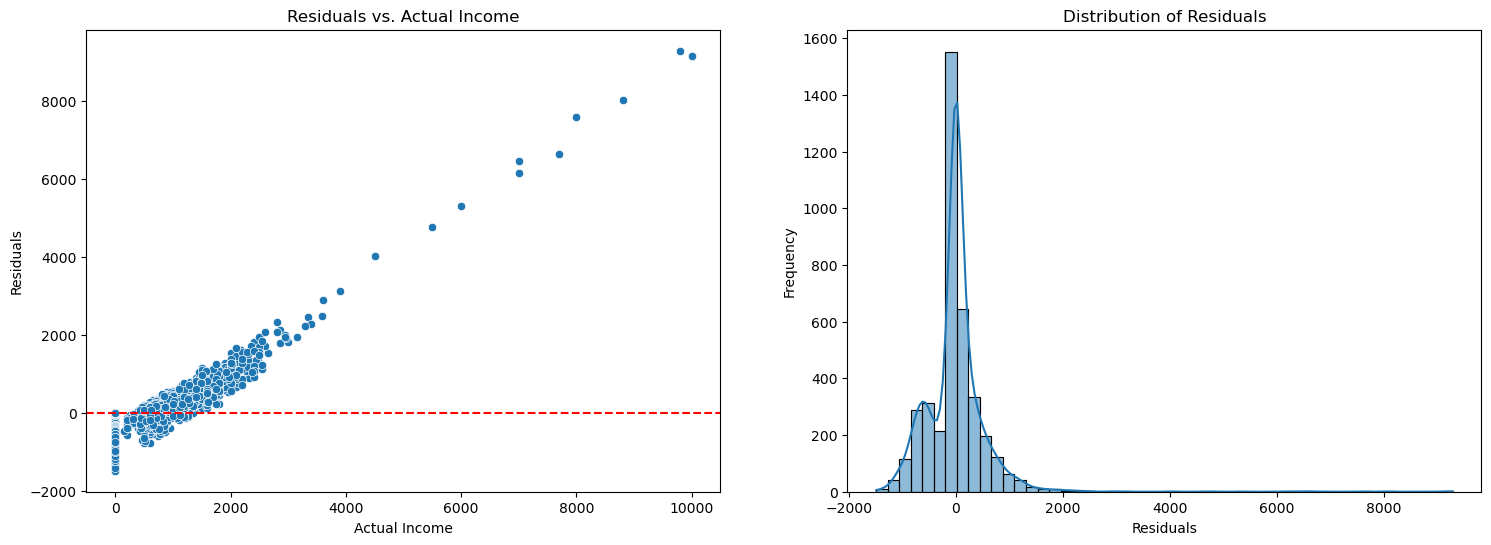

In [115]:
# 잔차 계산
residuals = y_test - y_pred

fig=plt.figure(figsize=(18,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

# 잔차의 산점도 시각화
sns.scatterplot(x=y_test, y=residuals, ax=ax1)
ax1.axhline(y=0, color='r', linestyle='--')  # 잔차가 0인 선 추가
ax1.set_xlabel("Actual Income")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs. Actual Income")

# 잔차의 히스토그램 시각화
sns.histplot(residuals, bins=50, kde=True, ax=ax2)
ax2.set_xlabel("Residuals")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of Residuals")

plt.show()

* 대부분의 데이터는 실제 값과 예측 값 사이 500정도 차이가 나는 것을 볼 수 있다.(RMSE:589)
* 그 외로 실제 소득 값이 큰 경우 잔차가 커지는 것이 보인다.
* 학습 데이터에 대한 다른 처리가 필요해 보인다.

> Random Forest 특성 중요도 

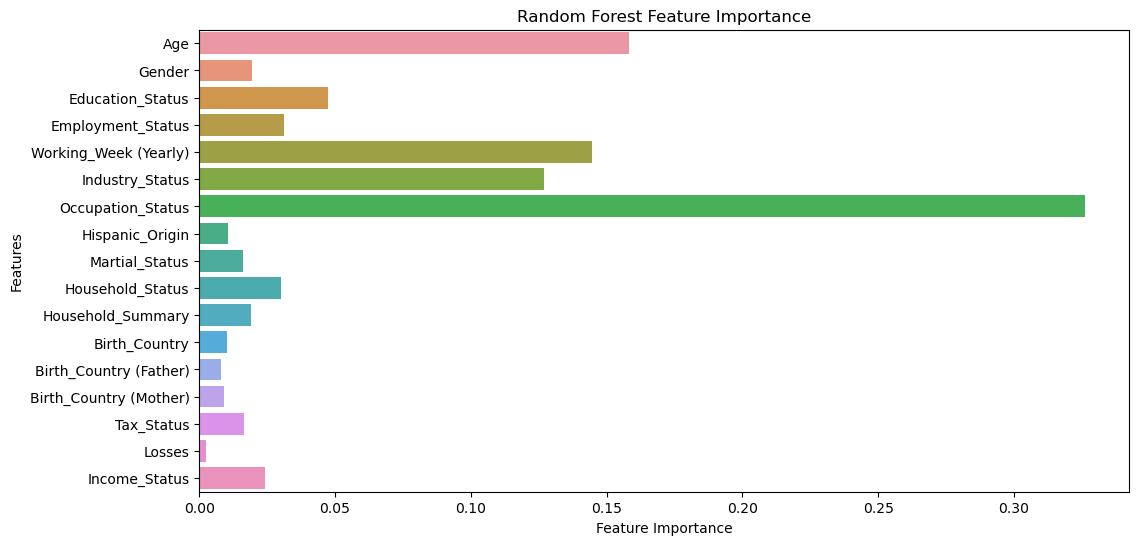

In [116]:
# 특성 중요도 추출
feature_importances = best_model.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

* 가중치를 주었던 Age(나이), Working_Week (Yearly)(주당 근무 시간), Occupation_Status(직업 분야) 외에도 Education_Status(최종학력), Industry_Status(산업 분야)열도 중요성이 부각되었다.
* 예상 외로 Martial_Status(결혼 여부)열은 중요도가 낮게 측정되었으며, Income(소득)에 대한 상관 관계로만 가중치를 부여하는 것이 오차를 줄이는 방법은 아닌 것 같다.


In [121]:
test.drop(['Race', 'Citizenship', 'Gains', 'Dividends'], axis=1, inplace=True)

preds = best_model.predict(test)

submission1 = pd.read_csv('./sample_submission.csv')
submission1['Income'] = abs(preds)
submission1

,ID,Income
0,TEST_0000,2.080266
1,TEST_0001,12.411987
2,TEST_0002,403.423041
3,TEST_0003,665.308538
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,1071.746738
9996,TEST_9996,854.362948
9997,TEST_9997,440.027693
9998,TEST_9998,0.000000


In [112]:
submission1.describe()

,Income
count,10000.000000
mean,560.481873
std,368.168427
min,-409.716095
25%,336.356201
50%,611.897888
75%,826.838577
max,1857.565918


In [55]:
#submission1.to_csv('./onlyRF_Weight_filter_5_submission.csv', index=False)

##### Dataset Reload
* train, test 데이터 셋 모두 'ID' 열 삭제
* 레이블 인코딩

In [108]:
train_2 = pd.read_csv('./train.csv')
test_2 = pd.read_csv('./test.csv')

train_2.drop(['ID'], axis=1, inplace=True)
test_2.drop(['ID'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

encoding_target = list(train_2.dtypes[train_2.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    
    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_2[i] = train_2[i].astype(str)
    test_2[i] = test_2[i].astype(str)
    
    le.fit(train_2[i])
    train_2[i] = le.transform(train_2[i])
    
    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test_2[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case)
    
    test_2[i] = le.transform(test_2[i])

#### AdaBoost & XGBoost 

* GridSearchCV를 이용하여 최적의 파라미터를 찾는것이 목표
* RMSE 지표 활용

Best parameters found(AdaB): {'learning_rate': 0.03, 'loss': 'exponential', 'n_estimators': 50}
Best parameters found(XGB): {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 13, 'n_estimators': 200}
AdaBoost RMSE: 627.1399287629202
XGBoost RMSE: 592.0914276678103


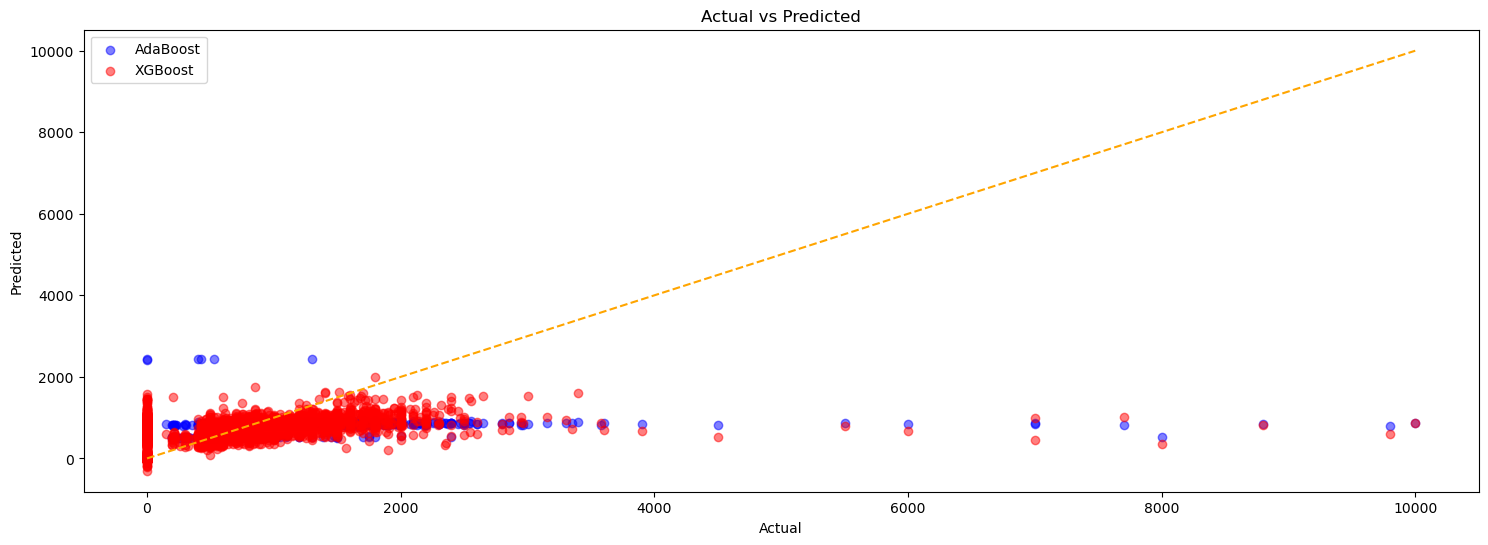

In [98]:
!pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Feature와 Target 분리
y = train_2['Income']
X = train_2.drop(['Income', 'Race', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Household_Summary'], axis=1)

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드 서치 객체 생성 (Ada)
adaboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.03, 0.05, 0.7],
    'loss': ['linear', 'square', 'exponential']
}

# 그리드 서치 객체 생성 (XGB)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.03, 0.05, 0.7],
    'max_depth': [3, 4, 5],
    'min_child_weight': [11, 13, 15],
    'gamma': [0.0, 0.1, 0.2]
}

# AdaBoost 모델
adaboost_grid_search = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_train, y_train)

# XGBoost 모델
xgb_grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid=xgb_param_grid, cv=3)
xgb_grid_search.fit(X_train, y_train)

# 평가
best_adaboost_model = adaboost_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

adaboost_pred = best_adaboost_model.predict(X_test)
xgb_pred = best_xgb_model.predict(X_test)

adaboost_rmse = np.sqrt(mean_squared_error(y_test, adaboost_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# 최적의 모델 출력
print("Best parameters found(AdaB):", adaboost_grid_search.best_params_)
print("Best parameters found(XGB):", xgb_grid_search.best_params_)

print("AdaBoost RMSE:", adaboost_rmse)
print("XGBoost RMSE:", xgb_rmse)

plt.figure(figsize=(18, 6))

# AdaBoost 모델
plt.scatter(y_test, adaboost_pred, color='blue', label='AdaBoost', alpha=0.5)

# XGBoost 모델
plt.scatter(y_test, xgb_pred, color='red', label='XGBoost', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linestyle='--')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

{'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 200} XGBoost RMSE: 592.4471757134258  
('Race', 'Citizenship', 'Gains', 'Dividends' 열 제외)

{'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 13, 'n_estimators': 200} XGBoost RMSE: 592.0914276678103 
('Race', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Household_Summary' 열 제외)

* Adaboost 모델은 XGBoost에 비해 RMSE 값이 높으므로 XGBoost모델 튜닝만 진행
* 기존 Random Forest 모델에서 제외했던 열과, 특성 중요도 중 하위 40.0이하 열을 제외한 결과
* 여전히 실제 데이터 중 높은 Income(소득)을 예측하는데 있어 큰 오차를 보인다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

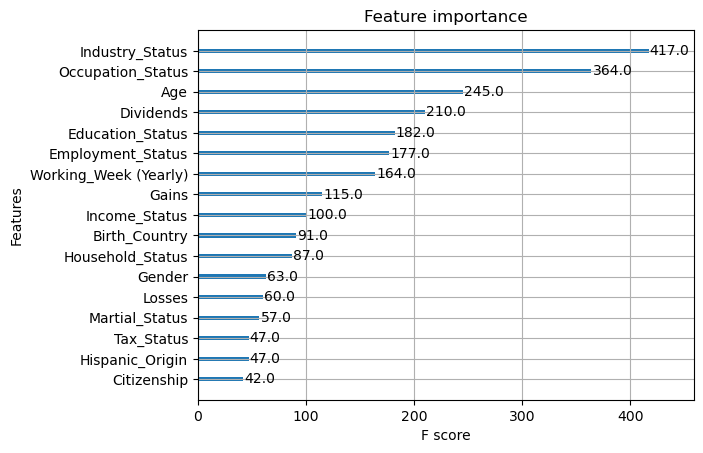

In [122]:
xgb.plot_importance(best_xgb_model)

* 기존 Random Forest 모델과 XGBoost 모델에서 특성 중요도가 많이 다른 것을 알 수 있다.
* 기존 모델(Random Forest)에서 Age(나이), Education_Status(최종학력), Working_Week (Yearly)(주당 근무 시간), Industry_Status(산업 분야), Occupation)_Status(직업 분야)였다면, 이번 모델(XGBoost)에서는 그래프 대로이다.

In [109]:
test_2.drop(['Race', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Household_Summary'], axis=1, inplace=True)

preds = best_xgb_model.predict(test_2)

submission2 = pd.read_csv('./sample_submission.csv')
submission2['Income'] = abs(preds)
submission2

,ID,Income
0,TEST_0000,3.293612
1,TEST_0001,48.246311
2,TEST_0002,444.869049
3,TEST_0003,652.818848
4,TEST_0004,2.162830
...,...,...
9995,TEST_9995,795.981995
9996,TEST_9996,776.269958
9997,TEST_9997,326.013092
9998,TEST_9998,10.350628


In [110]:
submission2.describe()

,Income
count,10000.000000
mean,562.204773
std,360.653229
min,0.046180
25%,327.534668
50%,613.055328
75%,818.300537
max,1976.378052


In [111]:
# submission2.to_csv('./xgb_par_2_submission.csv', index=False)